In [3]:
from compress import main
import pandas as pd
import matplotlib.pyplot as plt
import json
from compress import main
from tqdm.notebook import tqdm

In [4]:
models_df = pd.read_csv("../nunits_exp/results.csv")
models_df = models_df.loc[models_df["nunits"] <= 256]
nunits=256
data_aug=False

FileNotFoundError: [Errno 2] No such file or directory: '../nunits_exp/results.csv'

In [5]:
rrt_256 = json.load(open("./figures/Rank_Reduced_Training_nunits=256_dataaug=False.json", "r"))

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(models_df["nunits"], models_df["val_acc"], color='blue', s=50)
plt.scatter(rrt_256["rank_constraints"], rrt_256["val_accs"], color="red", s=50)
plt.title(f'Test Accuracies Vs Rank: Hidden Units={nunits}, Data Augmentation={bool(data_aug)}')
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig("./figures/Rank_constraint_vs_small_model_256.png")

NameError: name 'models_df' is not defined

<Figure size 720x432 with 0 Axes>

In [7]:
reg_models_df = pd.read_csv("./results.csv")
reg_models_df

,Unnamed: 0,model_id,train_acc,train_loss,val_acc,val_loss,datadir,nchannels,nclasses,nunits,...,l2,dropout,nlayers,rank_constraint,data_aug,device,train_dataset_path,val_dataset_path,checkpoint_path,training_time
0,0,0,0.67780,0.925592,0.5368,1.422607,datasets,3,10,256,...,0.00,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554
1,1,1,0.74796,0.731219,0.5570,1.295658,datasets,3,10,256,...,0.00,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442
2,2,2,0.64138,1.024430,0.5337,1.310140,datasets,3,10,256,...,0.00,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_2.pt,80.405609
3,3,3,0.65566,0.997742,0.5386,1.349168,datasets,3,10,256,...,0.01,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_3.pt,80.241499
4,4,4,0.58462,1.204006,0.5350,1.332390,datasets,3,10,256,...,0.01,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_4.pt,80.291114
5,5,5,0.52604,1.362426,0.5053,1.419070,datasets,3,10,256,...,0.01,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_5.pt,80.291972
6,6,6,0.24920,1.960396,0.2517,1.958487,datasets,3,10,256,...,0.10,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_6.pt,79.625279
7,7,7,0.23364,2.061307,0.2369,2.059770,datasets,3,10,256,...,0.10,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_7.pt,79.332326
8,8,8,0.18662,2.137762,0.1851,2.137904,datasets,3,10,256,...,0.10,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_8.pt,79.176732
9,9,9,0.99218,0.024848,0.5641,3.695829,datasets,3,10,1024,...,0.00,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_9.pt,81.474658


In [9]:
from types import SimpleNamespace
reg_models_df["rank"] = [0] * len(reg_models_df)

In [ ]:
for i in [0, 1, 3, 9, 10, 12]: 
    print(f"Compressing Model {i}")
    for rank in tqdm(list(range(1, 20, 5)) + list(range(20, 100, 10)) + list(range(100, 256, 50)) + list(range(300, reg_models_df.loc[i]["nunits"], 100))):
        args = SimpleNamespace(checkpoint_path=reg_models_df.loc[i]["checkpoint_path"], rank=rank)
        val_acc = main(args)
        reg_models_df.loc[len(reg_models_df)] = reg_models_df.loc[i]
        reg_models_df.loc[len(reg_models_df) - 1, "val_acc"] = float(val_acc)
        reg_models_df.loc[len(reg_models_df) - 1, "rank"] = float(rank)

Compressing Model 0


  0%|          | 0/16 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 256 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 2.785   Validation loss 2.783    Training accuracy: 0.114   Validation accuracy: 0.113

Total Parameters for Truncated Model: 920842
Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 256 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded and verif

  0%|          | 0/16 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 255 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 3.943   Validation loss 3.950    Training accuracy: 0.105   Validation accuracy: 0.105

Total Parameters for Truncated Model: 920842
Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 255 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded and verif

  0%|          | 0/16 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 252 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 221 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 2.423   Validation loss 2.422    Training accuracy: 0.108   Validation accuracy: 0.107

Total Parameters for Truncated Model: 920842
Applying truncated SVD on layer fc1.weight
Original rank 256 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 252 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 221 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded and verif

  0%|          | 0/24 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 1024 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 1023 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 5.710   Validation loss 5.704    Training accuracy: 0.104   Validation accuracy: 0.103

Total Parameters for Truncated Model: 5256202
Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 1024 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 1023 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded an

  0%|          | 0/24 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 1023 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 1024 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 3.639   Validation loss 3.623    Training accuracy: 0.101   Validation accuracy: 0.102

Total Parameters for Truncated Model: 5256202
Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 1023 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 1024 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded an

  0%|          | 0/24 [00:00<?, ?it/s]

Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 1
Applying truncated SVD on layer fc2.weight
Original rank 997 and reconstructed rank 1
Applying truncated SVD on layer fc3.weight
Original rank 962 and reconstructed rank 1
Data augmentation on the train set: FALSE
Files already downloaded and verified
Data augmentation on the val set: FALSE
Files already downloaded and verified
=================== Summary for model Model with 1-Rank Approximation @ Inference===================
 Training loss: 2.403   Validation loss 2.402    Training accuracy: 0.108   Validation accuracy: 0.112

Total Parameters for Truncated Model: 5256202
Applying truncated SVD on layer fc1.weight
Original rank 1024 and reconstructed rank 6
Applying truncated SVD on layer fc2.weight
Original rank 997 and reconstructed rank 6
Applying truncated SVD on layer fc3.weight
Original rank 962 and reconstructed rank 6
Data augmentation on the train set: FALSE
Files already downloaded and ve

KeyboardInterrupt: 

In [11]:
reg_models_df = reg_models_df.loc[0:281]

In [12]:
reg_models_df

,Unnamed: 0,model_id,train_acc,train_loss,val_acc,val_loss,datadir,nchannels,nclasses,nunits,...,dropout,nlayers,rank_constraint,data_aug,device,train_dataset_path,val_dataset_path,checkpoint_path,training_time,rank
0,0,0,0.67780,0.925592,0.5368,1.422607,datasets,3,10,256,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,0
1,1,1,0.74796,0.731219,0.5570,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,0
2,2,2,0.64138,1.024430,0.5337,1.310140,datasets,3,10,256,...,0.50,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_2.pt,80.405609,0
3,3,3,0.65566,0.997742,0.5386,1.349168,datasets,3,10,256,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_3.pt,80.241499,0
4,4,4,0.58462,1.204006,0.5350,1.332390,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_4.pt,80.291114,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,12,12,0.67132,0.963105,0.5426,1.327274,datasets,3,10,1024,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_12.pt,129.036036,600
134,12,12,0.67132,0.963105,0.5424,1.327274,datasets,3,10,1024,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_12.pt,129.036036,700
135,12,12,0.67132,0.963105,0.5422,1.327274,datasets,3,10,1024,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_12.pt,129.036036,800
136,12,12,0.67132,0.963105,0.5423,1.327274,datasets,3,10,1024,...,0.00,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_12.pt,129.036036,900


In [21]:
baseline_256 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 0) & (reg_models_df["rank"] != 0)]
baseline_256

,Unnamed: 0,model_id,train_acc,train_loss,val_acc,val_loss,datadir,nchannels,nclasses,nunits,...,dropout,nlayers,rank_constraint,data_aug,device,train_dataset_path,val_dataset_path,checkpoint_path,training_time,rank
18,0,0,0.6778,0.925592,0.1129,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,1
19,0,0,0.6778,0.925592,0.2241,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,6
20,0,0,0.6778,0.925592,0.3257,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,11
21,0,0,0.6778,0.925592,0.3721,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,16
22,0,0,0.6778,0.925592,0.4091,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,20
23,0,0,0.6778,0.925592,0.4632,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,30
24,0,0,0.6778,0.925592,0.4840,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,40
25,0,0,0.6778,0.925592,0.4946,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,50
26,0,0,0.6778,0.925592,0.5129,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,60
27,0,0,0.6778,0.925592,0.5168,1.422607,datasets,3,10,256,...,0.0,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_0.pt,79.768554,70


In [22]:
dropout_256 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 1) & (reg_models_df["rank"] != 0)]
dropout_256

,Unnamed: 0,model_id,train_acc,train_loss,val_acc,val_loss,datadir,nchannels,nclasses,nunits,...,dropout,nlayers,rank_constraint,data_aug,device,train_dataset_path,val_dataset_path,checkpoint_path,training_time,rank
34,1,1,0.74796,0.731219,0.1053,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,1
35,1,1,0.74796,0.731219,0.2459,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,6
36,1,1,0.74796,0.731219,0.3624,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,11
37,1,1,0.74796,0.731219,0.4037,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,16
38,1,1,0.74796,0.731219,0.4389,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,20
39,1,1,0.74796,0.731219,0.4769,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,30
40,1,1,0.74796,0.731219,0.5003,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,40
41,1,1,0.74796,0.731219,0.5132,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,50
42,1,1,0.74796,0.731219,0.5264,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,60
43,1,1,0.74796,0.731219,0.5321,1.295658,datasets,3,10,256,...,0.25,3,0,0,cuda,./processed_train_dataset.pt,./processed_val_dataset.pt,./batched_models/model_1.pt,80.393442,70


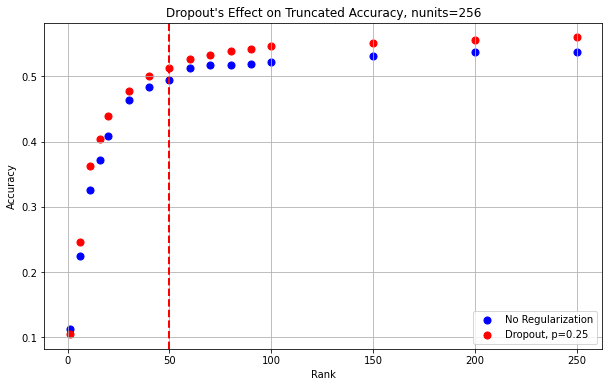

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(baseline_256["rank"], baseline_256["val_acc"], color='blue', s=50, label="No Regularization")
plt.scatter(dropout_256["rank"], dropout_256["val_acc"], color="red", s=50, label="Dropout, p=0.25")
plt.title(f"Dropout's Effect on Truncated Accuracy, nunits=256")
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig("./figures/Dropout_256.png", dpi=600)

In [34]:
l2_256 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 3) & (reg_models_df["rank"] != 0)]
baseline_1024 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 9) & (reg_models_df["rank"] != 0)]
dropout_1024 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 10) & (reg_models_df["rank"] != 0)]
l2_1024 = reg_models_df.loc[(reg_models_df["Unnamed: 0"] == 12) & (reg_models_df["rank"] != 0)]

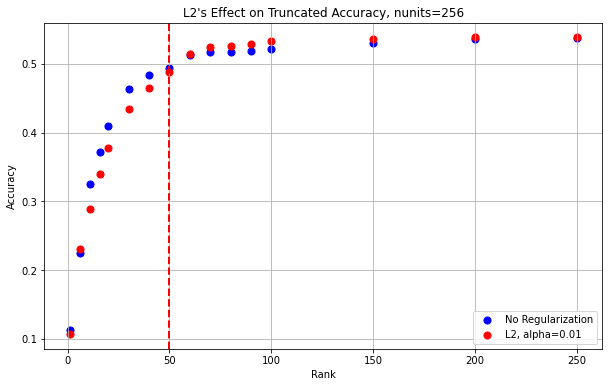

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(baseline_256["rank"], baseline_256["val_acc"], color='blue', s=50, label="No Regularization")
plt.scatter(l2_256["rank"], l2_256["val_acc"], color="red", s=50, label="L2, alpha=0.01")
plt.title(f"L2's Effect on Truncated Accuracy, nunits=256")
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig("./figures/L2_256.png", dpi=600)

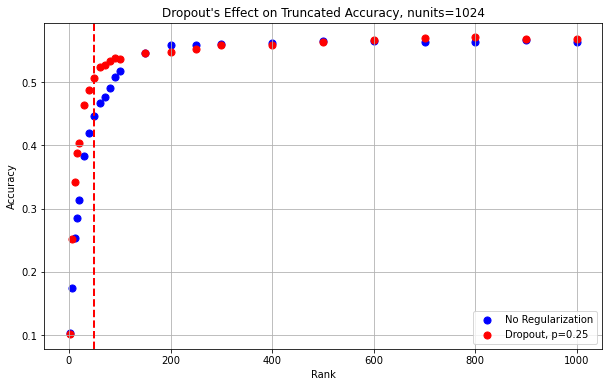

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(baseline_1024["rank"], baseline_1024["val_acc"], color='blue', s=50, label="No Regularization")
plt.scatter(dropout_1024["rank"], dropout_1024["val_acc"], color="red", s=50, label="Dropout, p=0.25")
plt.title(f"Dropout's Effect on Truncated Accuracy, nunits=1024")
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig("./figures/Dropout_1024.png", dpi=600)

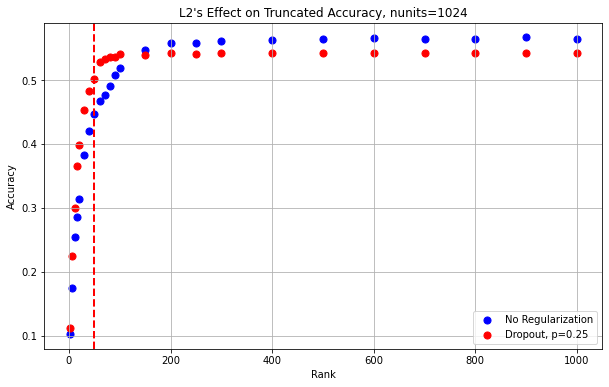

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(baseline_1024["rank"], baseline_1024["val_acc"], color='blue', s=50, label="No Regularization")
plt.scatter(l2_1024["rank"], l2_1024["val_acc"], color="red", s=50, label="Dropout, p=0.25")
plt.title(f"L2's Effect on Truncated Accuracy, nunits=1024")
plt.xlabel('Rank')
plt.axvline(x=50, color='red', linestyle='--', linewidth=2)
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.savefig("./figures/L2_1024.png", dpi=600)